In [21]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
ls ../ParamSweeps/WrightFisher/

fixations_ss.001_1.out*  fixations_ss.01_3.out*  fixations_ss.1_2.out*
fixations_ss.001_2.out*  fixations_ss10_1.out*   fixations_ss1_2.out*
fixations_ss.001_3.out*  fixations_ss10_2.out*   fixations_ss.1_3.out*
fixations_ss.01_1.out*   fixations_ss.1_1.out*   fixations_ss1_3.out*
fixations_ss.01_2.out*   fixations_ss1_1.out*


In [10]:
fix001 = pd.read_csv("../ParamSweeps/WrightFisher/fixations_ss.001_1.out",index_col=0)
fix01 = pd.read_csv("../ParamSweeps/WrightFisher/fixations_ss.01_1.out",index_col=0)
fixp1 = pd.read_csv("../ParamSweeps/WrightFisher/fixations_ss.1_1.out",index_col=0)
fix1 = pd.read_csv("../ParamSweeps/WrightFisher/fixations_ss1_1.out",index_col=0)
fix10 = pd.read_csv("../ParamSweeps/WrightFisher/fixations_ss10_1.out",index_col=0)

fDF = pd.DataFrame({".001":fix001["f"],".01":fix01["f"],".1":fixp1["f"],"1":fix1["f"],"10":fix10["f"]})
fDF.head()

,.001,.01,.1,1,10
gen,,,,,
954,0.000000,NaN,NaN,NaN,NaN
1297,20.834449,NaN,NaN,NaN,NaN
3675,NaN,16.388309,NaN,NaN,NaN
3781,20.834449,NaN,NaN,NaN,NaN
4783,NaN,34.302763,NaN,NaN,NaN


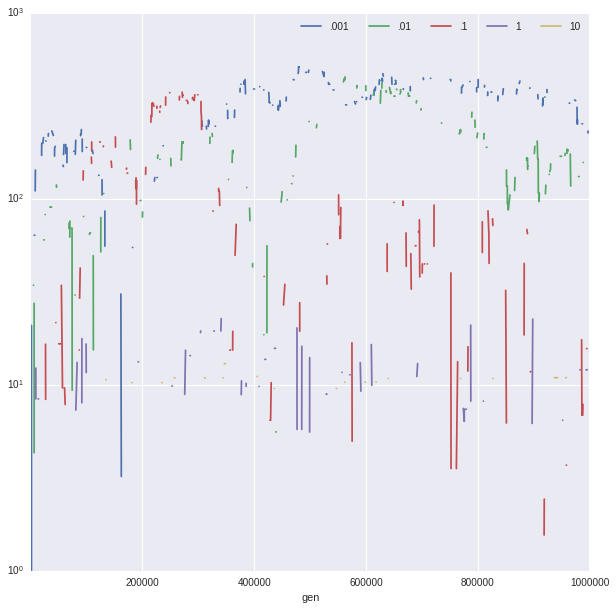

In [27]:
fDF.plot(legend=False,figsize=(10,10))
plt.yscale("log")
plt.legend(ncol=5)

In [12]:
for col in fDF.columns:
    print "Number of fixations for strength {}: {}".format(col,len(fDF[col].dropna()))

Number of fixations for strength .001: 523
Number of fixations for strength .01: 534
Number of fixations for strength .1: 431
Number of fixations for strength 1: 273
Number of fixations for strength 10: 212


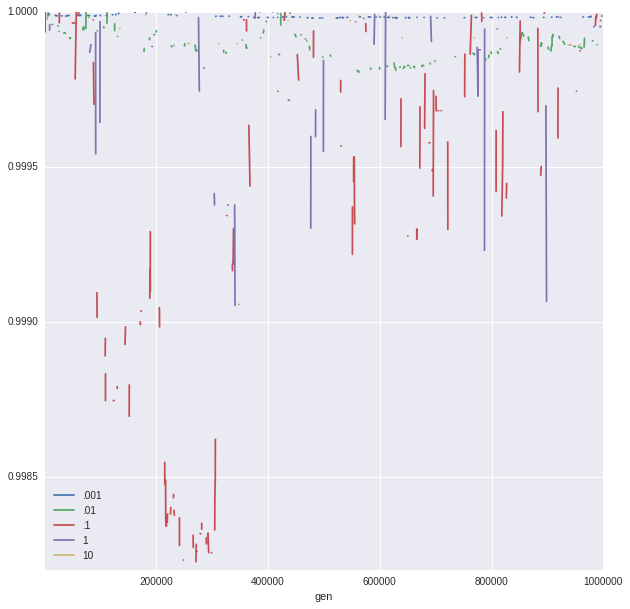

In [31]:
wDF = pd.DataFrame({".001":fix001["w"],".01":fix01["w"],".1":fixp1["w"],"1":fix1["w"],"10":fix10["w"]})
wDF.plot(figsize=(10,10))

In [33]:
files = !ls ../ParamSweeps/WrightFisher/*.out
ffiles

['../ParamSweeps/WrightFisher/fixations_ss.001_1.out',
 '../ParamSweeps/WrightFisher/fixations_ss.001_2.out',
 '../ParamSweeps/WrightFisher/fixations_ss.001_3.out',
 '../ParamSweeps/WrightFisher/fixations_ss.01_1.out',
 '../ParamSweeps/WrightFisher/fixations_ss.01_2.out',
 '../ParamSweeps/WrightFisher/fixations_ss.01_3.out',
 '../ParamSweeps/WrightFisher/fixations_ss10_1.out',
 '../ParamSweeps/WrightFisher/fixations_ss10_2.out',
 '../ParamSweeps/WrightFisher/fixations_ss.1_1.out',
 '../ParamSweeps/WrightFisher/fixations_ss1_1.out',
 '../ParamSweeps/WrightFisher/fixations_ss.1_2.out',
 '../ParamSweeps/WrightFisher/fixations_ss1_2.out',
 '../ParamSweeps/WrightFisher/fixations_ss.1_3.out',
 '../ParamSweeps/WrightFisher/fixations_ss1_3.out']

In [38]:
fileD = {}
for i in files:
    fname = i.split("/")[3]
    ss = fname.split("_")[1].lstrip("ss")
    rep = fname.split("_")[2].split(".")[0]
    fileD["-".join([ss,rep])] = pd.read_csv(i,index_col=0)

In [39]:
fileD.keys()

['.1-1',
 '.1-2',
 '.1-3',
 '.01-1',
 '.01-3',
 '.01-2',
 '1-1',
 '1-3',
 '1-2',
 '.001-2',
 '.001-3',
 '.001-1',
 '10-1',
 '10-2']

In [42]:
def collate_columns(colname):
    return pd.DataFrame({i:fileD[i][colname] for i in fileD})

In [71]:
def plot_all(df):
    
    styleD1 = {".001":"b--",".01":"r--",".1":"c--","1":"k--","10":"m--"}
    styleD2 = {".001":"blue",".01":"red",".1":"cyan","1":"black","10":"magenta"}
    
    ax = plt.plot()
    for col in df.columns:
        df[col].plot(style=styleD1[col[:-2]],figsize=(10,10))
        
    legend_proxies = []
    dts = styleD2.keys()
    dts.sort(key=float)
    dts.reverse()
    
    for dt in dts:
        prox = mlines.Line2D([], [], color=styleD2[dt], label=dt, linewidth=3)
        legend_proxies.append(prox)

    plt.legend(handles=legend_proxies,bbox_to_anchor=(1.25,1),title="dt")

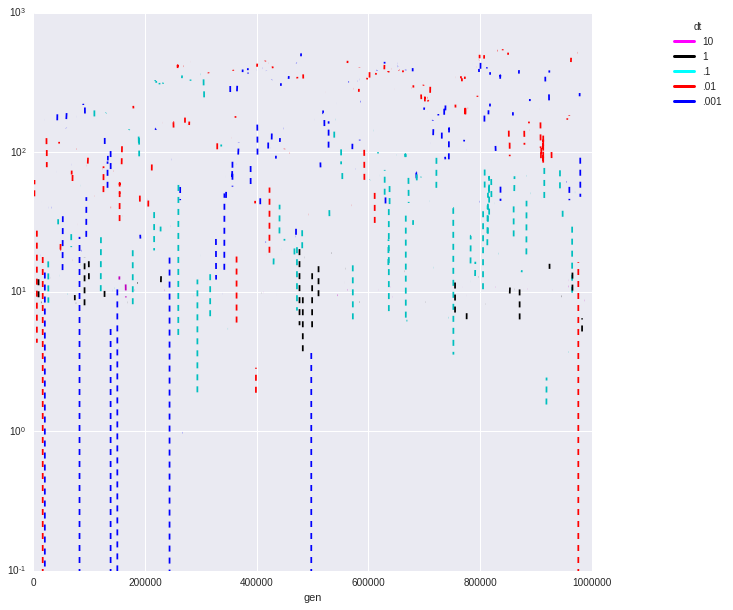

In [78]:
fs = collate_columns("f")
plt.plot(figsize=(10,10))
plot_all(fs)
plt.yscale("log")

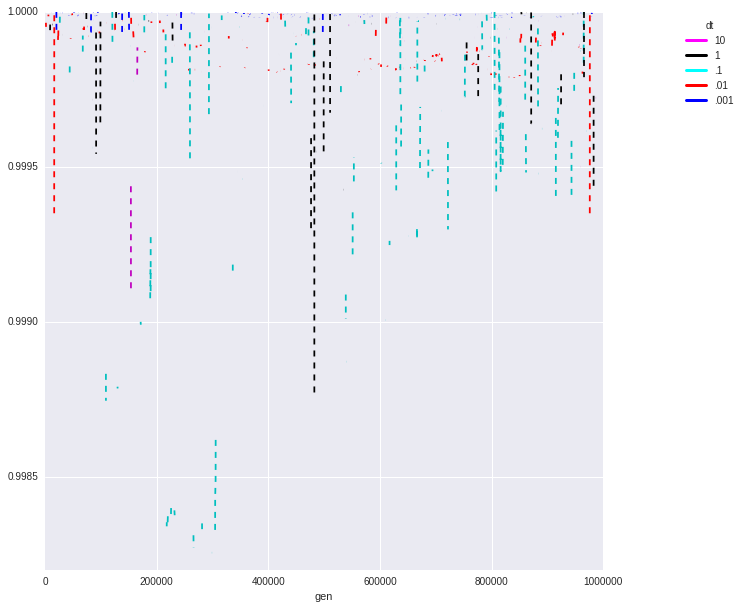

In [73]:
ws = collate_columns("w")
plt.plot(figsize=(10,10))
plot_all(ws)

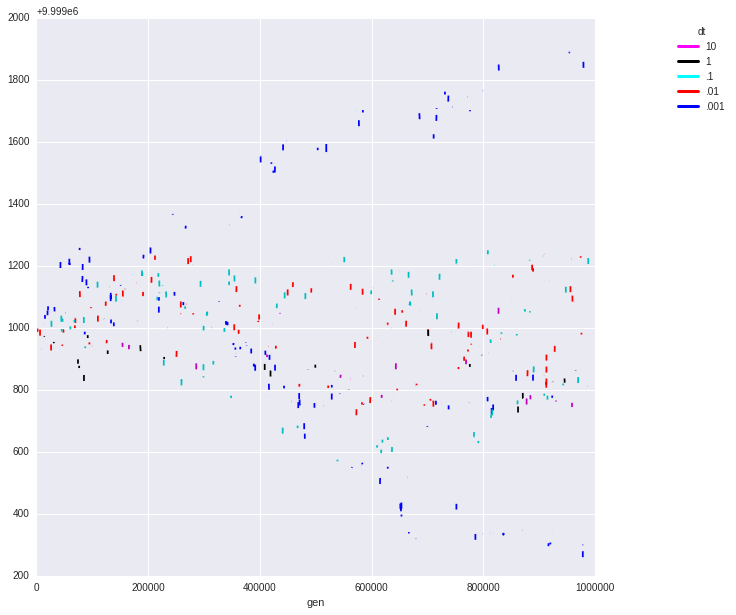

In [75]:
k1s = collate_columns("k1")
plt.plot(figsize=(10,10))
plot_all(k1s)

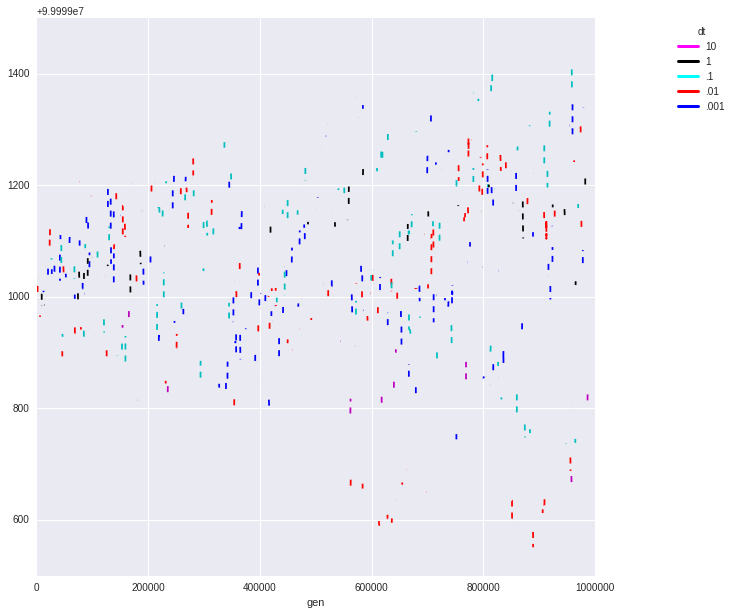

In [76]:
k2s = collate_columns("k2")
plt.plot(figsize=(10,10))
plot_all(k2s)